In [247]:
import numpy as np
import pandas as pd
import re

data1 = pd.read_csv('bigdata/data.csv', header=None)
data1 = data1.rename(columns={0: 'surname', 1: 'name', 2: 'father_name', 3: 'sex'})

In [248]:
data1.head(10)

,surname,name,father_name,sex
0,АБАБИЙ,АНДРЕЙ,ВАСИЛЬЕВИЧ,М
1,АБАБИЛОВ,ДМИТРИЙ,НИКОЛАЕВИЧ,М
2,АБАБИЛОВ,ВЛАДИМИР,ИВАНОВИЧ,М
3,АБАБИЛОВ,СЕРГЕЙ,ИВАНОВИЧ,М
4,АБАБИЛОВ,ЮРИЙ,ВЛАДИМИРОВИЧ,М
5,АБАБИЛОВ,АЛЕКСЕЙ,НИКОЛАЕВИЧ,М
6,АБАБИЛОВ,ВАСИЛИЙ,ФЕДОРОВИЧ,М
7,АБАБИЛОВ,СЕРГЕЙ,ВАСИЛЬЕВИЧ,М
8,АБАБИЛОВ,ЛЕОНИД,АЛЕКСЕЕВИЧ,М
9,АБАБИЛОВА,НИНА,ПЕТРОВНА,Ж


In [249]:
data1.describe(include='all')

,surname,name,father_name,sex
count,6228583,6228540,6225756,6228594
unique,383439,45194,81003,2
top,ИВАНОВА,АЛЕКСАНДР,АЛЕКСАНДРОВНА,Ж
freq,24285,271380,310929,3505321


In [250]:
data1.shape

(6228594, 4)

In [251]:
data2 = pd.read_csv('data_test/list_full.csv', header=None, delimiter=';')
data2 = data2.rename(columns={0: 'surname', 1: 'name', 2: 'father_name', 3: 'sex'})

data2['surname'] = data2['surname'].str.upper()
data2['name'] = data2['name'].str.upper()
data2['father_name'] = data2['father_name'].str.upper()


data2['sex'] = data2['sex'].replace({'M': 'М', 'F': 'Ж'})

In [252]:
data2.head(10)

,surname,name,father_name,sex
0,ДЕДИН,ГАМЗА,АСЛАМОВИЧ,М
1,ДЕЙКИНА,ВЛАСТА,КУЗМИНИЧНА,Ж
2,КРАЙНЕВА,ЛЮСИЯ,АРАРАТОВНА,Ж
3,ХЛЮСТОВА,АНИСАТ,РАФИЛЬЕВНА,Ж
4,ЗАКОМОРНЫЙ,БЕХРУЗ,ТАЛИБОВИЧ,М
5,КОЗЯКОВА,МАРЕТ,БАГАУТДИНОВНА,Ж
6,ДМИТРИКОВА,ЭНГЕЛЬСИНА,МАЛХАЗОВНА,Ж
7,ГАРТНЕР,СОБИР,АЛИГУСЕЙН ОГЛЫ,М
8,ПЕСТРЕЦОВА,ГЮЛЬНАЗ,ОГАННЕСОВНА,Ж
9,БУТЕНКОВА,ЧЕЧЕНА,NaN,Ж


In [253]:
data2.describe(include='all')

,surname,name,father_name,sex
count,2990000,2988546,2807910,2990000
unique,37708,4790,7039,2
top,ЗАРЮТА,БАЙЛАК,ФАНИСОВНА,Ж
freq,207,1563,726,1496342


In [254]:
data2.shape

(2990000, 4)

In [255]:
data = pd.concat([data1, data2], ignore_index=True)

data = data[data['father_name'].str.len() >= 4]

# data = data2.copy()

In [256]:
data.describe(include='all')

,surname,name,father_name,sex
count,9017503,9016103,9017511,9017511
unique,382304,43531,81061,2
top,ИВАНОВА,АЛЕКСАНДР,АЛЕКСАНДРОВНА,Ж
freq,24368,271354,311563,4902633


In [257]:
data.shape

(9017511, 4)

In [258]:
males = data.loc[data['sex'] == 'М']
females = data.loc[data['sex'] == 'Ж']

In [259]:
pd.isnull(data).sum()

surname           8
name           1408
father_name       0
sex               0
dtype: int64

In [260]:
pd.isnull(males).sum()

surname          4
name           400
father_name      0
sex              0
dtype: int64

In [261]:
pd.isnull(females).sum()

surname           4
name           1008
father_name       0
sex               0
dtype: int64

In [262]:
data.duplicated().sum()

2006082

## Распределение по полу

In [263]:
sex_distr = data['sex'].value_counts()
sex_distr

sex
Ж    4902633
М    4114878
Name: count, dtype: int64

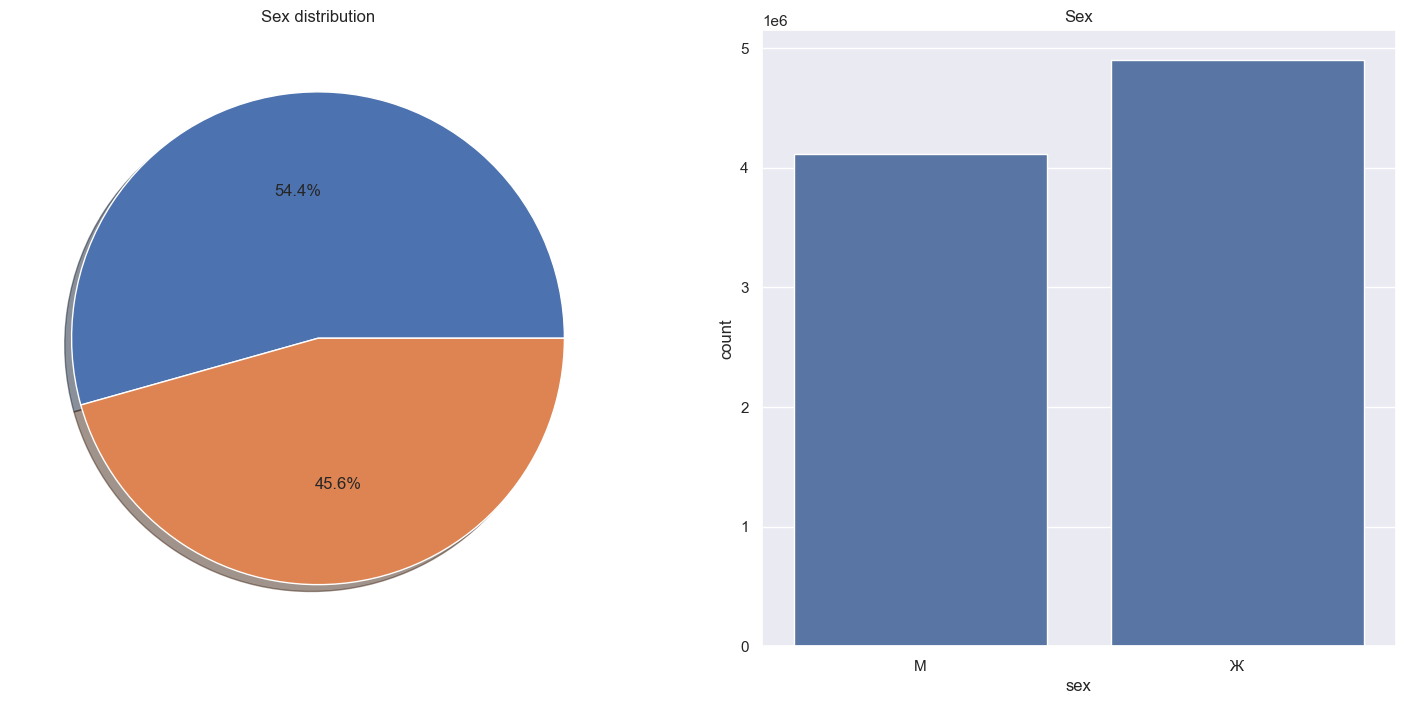

In [264]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid')
f, ax = plt.subplots(1, 2, figsize=(18, 8))
ax[0].pie(x=sex_distr, autopct='%1.1f%%', shadow=True)

ax[0].set_title('Sex distribution')
ax[0].set_ylabel('')

sns.countplot(x='sex', data=data, ax=ax[1])
ax[1].set_title('Sex')
plt.show()

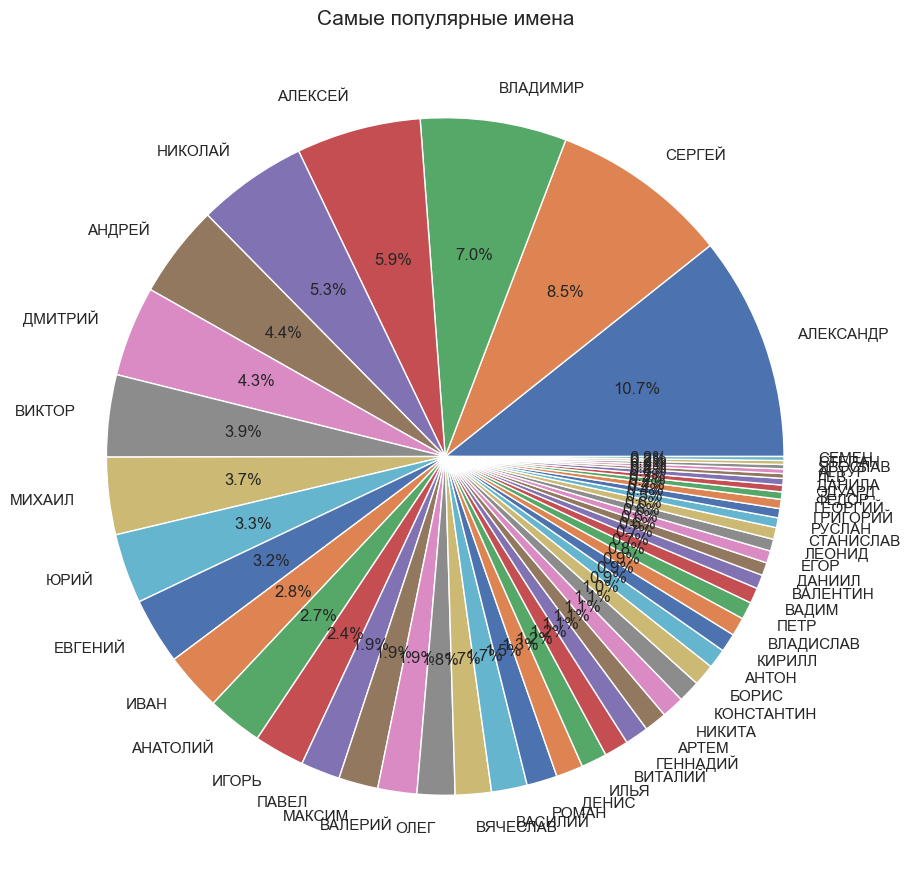

In [265]:
labels = males['name'].value_counts().index[:50]
sizes = males['name'].value_counts().values[:50]
plt.figure(figsize=(11,11))
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Самые популярные имена", size=15)
plt.show()

In [266]:
labels = males['name'].value_counts().index[-50:]
sizes = males['name'].value_counts().values[-50:]
unpopular_names = pd.DataFrame({'labels': labels, 'sizes': sizes})
unpopular_names

,labels,sizes
0,ГУТАШ,1
1,ЧЕСЛОВАС,1
2,АНДРЕЙИОСИФО,1
3,ХАХАТУР,1
4,СТРАТОН,1
5,МАМАДАМИН,1
6,ДАЙВИС,1
7,НИТИШ,1
8,НУРАТИН,1
9,МУНКО-ЦЫРЕН,1


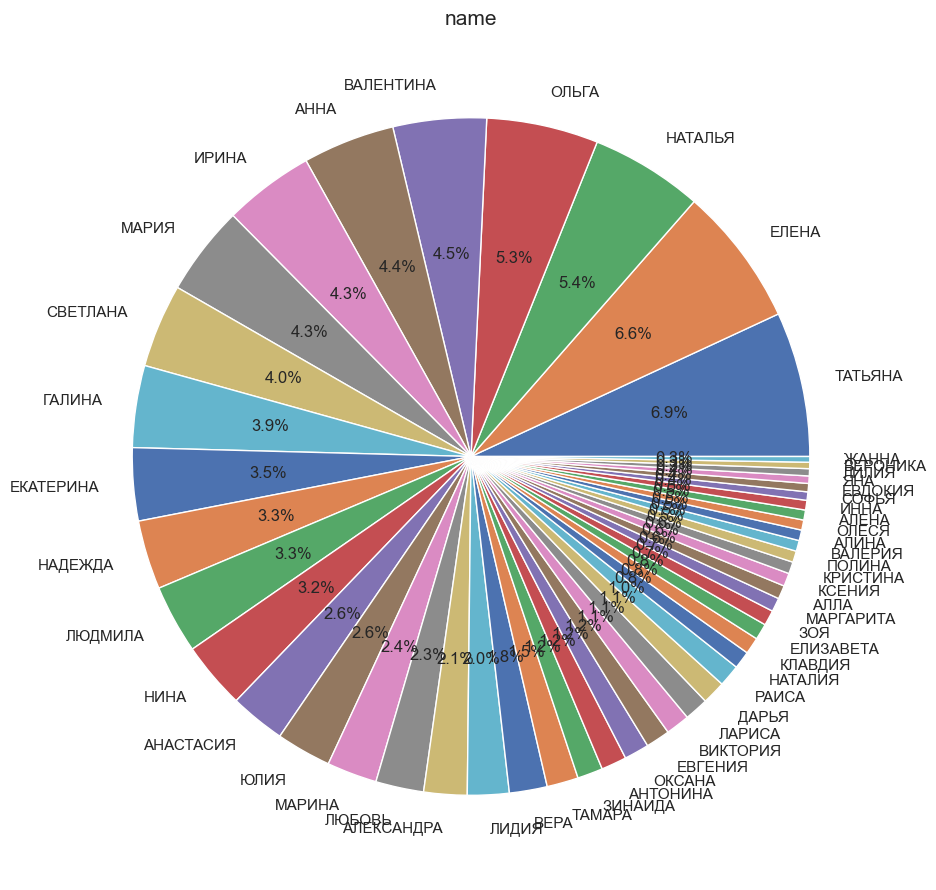

In [267]:
labels = females['name'].value_counts().index[:50]
sizes = females['name'].value_counts().values[:50]
plt.figure(figsize=(11,11))
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("name", size=15)
plt.show()

In [268]:
labels = females['name'].value_counts().index[-50:]
sizes = females['name'].value_counts().values[-50:]
unpopular_names = pd.DataFrame({'labels': labels, 'sizes': sizes})
unpopular_names


,labels,sizes
0,БРИГИТТА,1
1,МУНОЖОТХОН,1
2,ЗАЗАЙ,1
3,ДИТРИЙ,1
4,ЭЛЬДАНА,1
5,МОРИЯ,1
6,ФАНА,1
7,САБИНАЗ,1
8,НИБИРЯ,1
9,РАЙХЕН,1


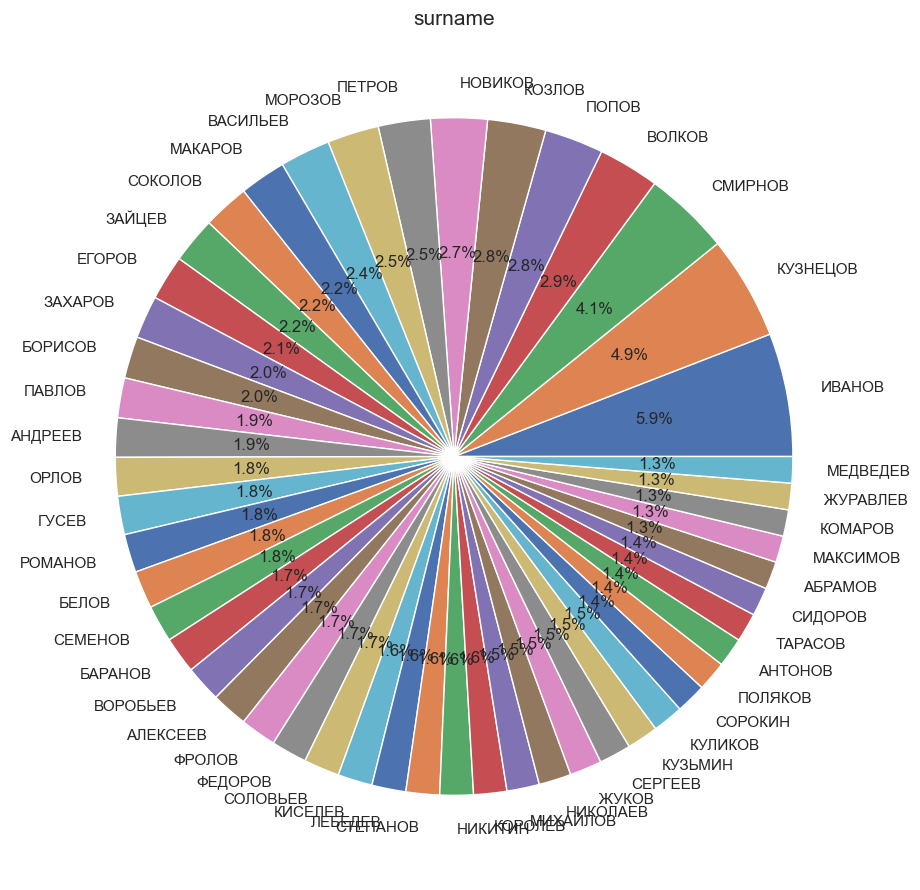

In [269]:
labels = males['surname'].value_counts().index[:50]
sizes = males['surname'].value_counts().values[:50]
plt.figure(figsize=(11,11))
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("surname", size=15)
plt.show()

In [270]:
labels = males['surname'].value_counts().index[-50:]
sizes = males['surname'].value_counts().values[-50:]
unpopular_surnames = pd.DataFrame({'labels': labels, 'sizes': sizes})
unpopular_surnames

,labels,sizes
0,ГОНСАЛЕС-БАУТИН,1
1,КАНУРАШИН,1
2,ПОРАБЕЙКИН,1
3,ГУРТ,1
4,СЛАБАЗЕНЮК,1
5,ЦИЦИШВИЛИ,1
6,ЮНСАЛИЕВ,1
7,БАРИСАС,1
8,КОСЕМУК,1
9,САВМОКОВ,1


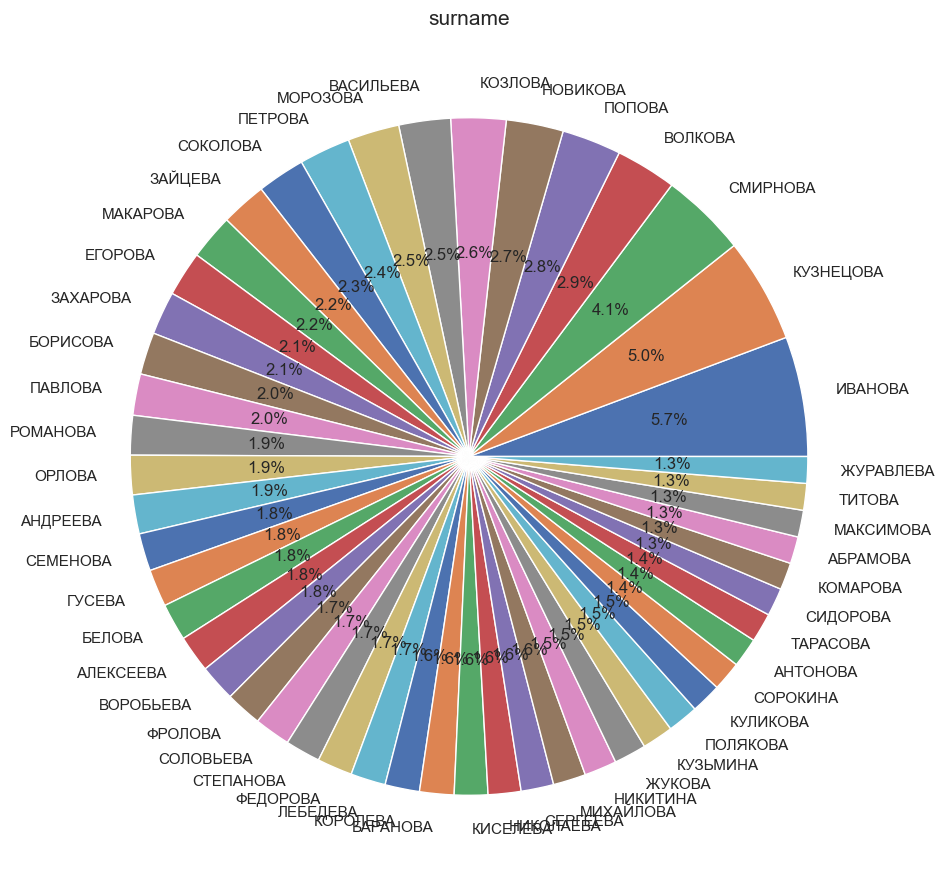

In [271]:
labels = females['surname'].value_counts().index[:50]
sizes = females['surname'].value_counts().values[:50]
plt.figure(figsize=(11,11))
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("surname", size=15)
plt.show()

In [272]:
labels = females['surname'].value_counts().index[-50:]
sizes = females['surname'].value_counts().values[-50:]
unpopular_surnames = pd.DataFrame({'labels': labels, 'sizes': sizes})
unpopular_surnames

,labels,sizes
0,ЗГУЕВИЧ,1
1,ЧУДАККОВА,1
2,МАМЕДКИНА,1
3,КРИВОЧКИНА,1
4,ТЕСИНА,1
5,ХУЛМАГОМЕДОВА,1
6,САВЕЛЕНКО,1
7,ШЛЯМИНОВА,1
8,НУРМЛИЕВА,1
9,КРАЧУНОВА,1


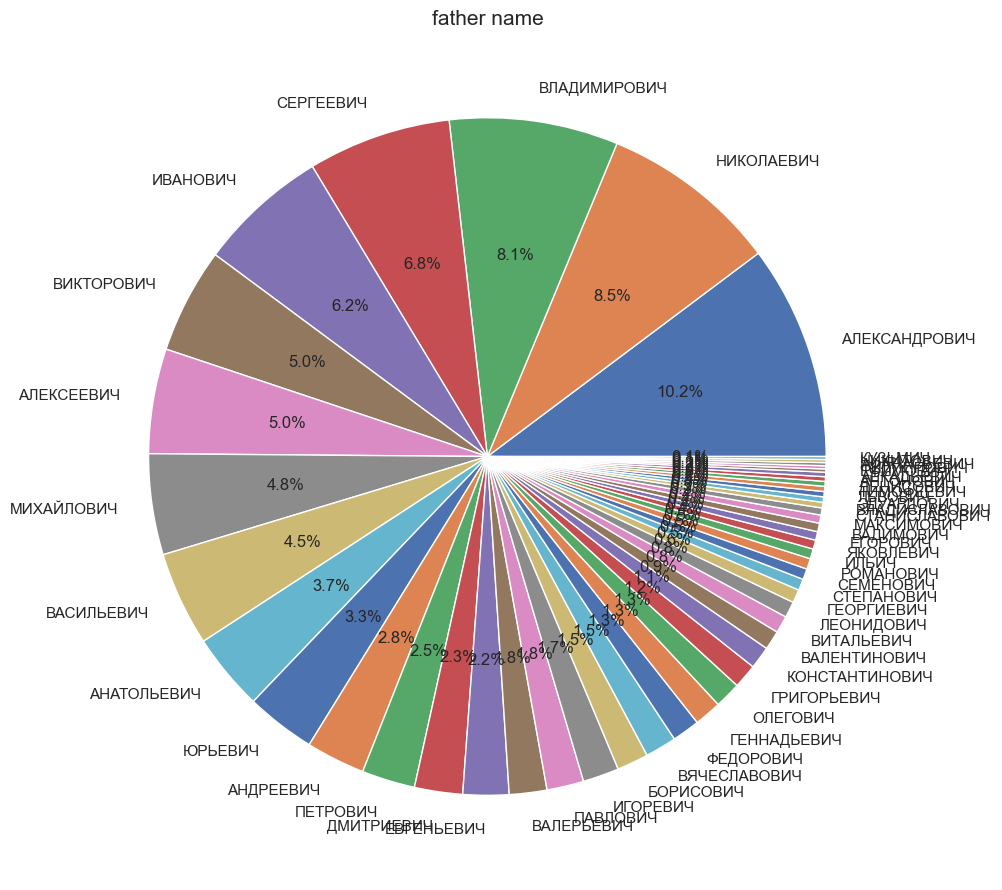

In [273]:
labels = males['father_name'].value_counts().index[:50]
sizes = males['father_name'].value_counts().values[:50]
plt.figure(figsize=(11,11))
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("father name", size=15)
plt.show()

In [274]:
labels = males['father_name'].value_counts().index[-50:]
sizes = males['father_name'].value_counts().values[-50:]
unpopular_f_names = pd.DataFrame({'labels': labels, 'sizes': sizes})
unpopular_f_names

,labels,sizes
0,АЗЕР КЫЗЫ,1
1,БЕЙКИШИ ОГЛЫ,1
2,КИКОЛАЕВИЧ,1
3,ЖАКСЫЛЫК УЛЫ,1
4,НАЗЫБЕЕВИЧ,1
5,АРСЛАН АБДУЛСАЛАМ,1
6,ХАДЖИ-БЕКОВИЧ,1
7,ШОЙИМОВИЧ,1
8,ПЕТРОВИЧ ОТКАЗНОЙ,1
9,МАИСОГЛЫ,1


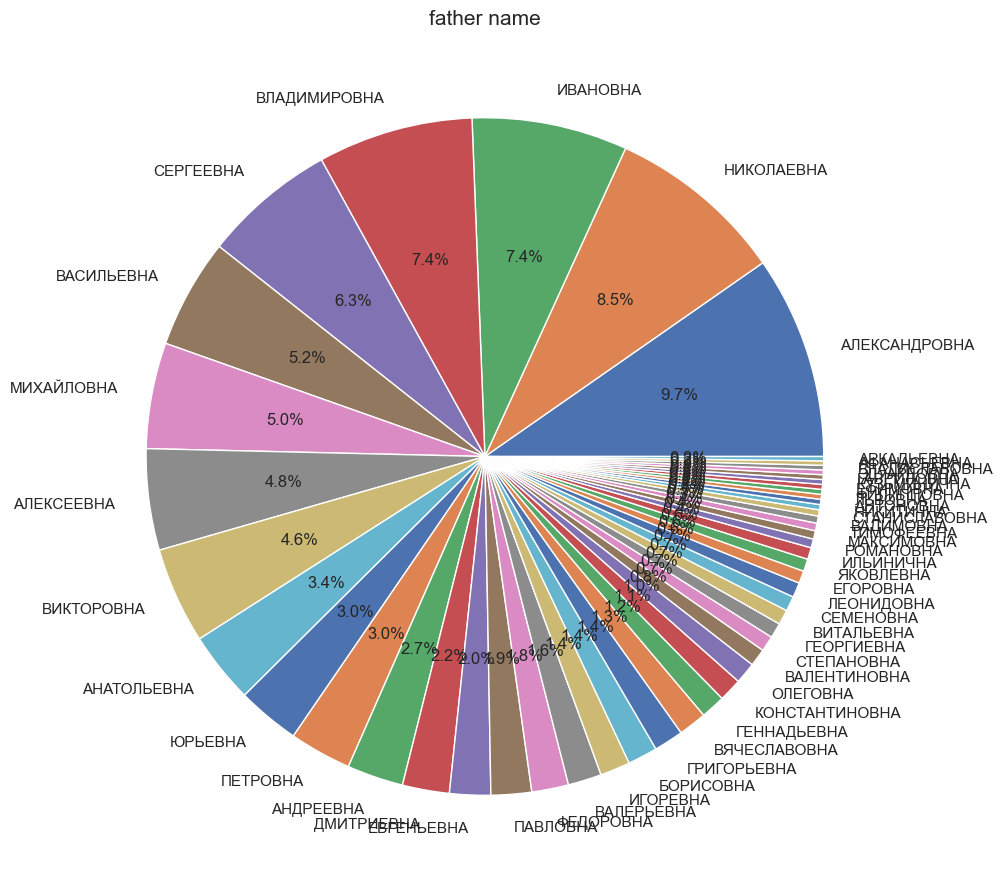

In [275]:
labels = females['father_name'].value_counts().index[:50]
sizes = females['father_name'].value_counts().values[:50]
plt.figure(figsize=(11,11))
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("father name", size=15)
plt.show()

In [276]:
labels = females['father_name'].value_counts().index[-50:]
sizes = females['father_name'].value_counts().values[-50:]
unpopular_fnames = pd.DataFrame({'labels': labels, 'sizes': sizes})
unpopular_fnames

,labels,sizes
0,ХАЙЛОЛИФОВНА,1
1,МИСИНОВНА,1
2,ИЛИАСОВНА,1
3,САДИЯ,1
4,НАМИЧ ОГЛЫ,1
5,ДЖУМАУДОВНА,1
6,ВЯЧЕСЛАВРВНА,1
7,ДИЛФАСОВНА,1
8,УИСЫНБАЕВНА,1
9,СЯНЬБАОВНА,1


# EDA

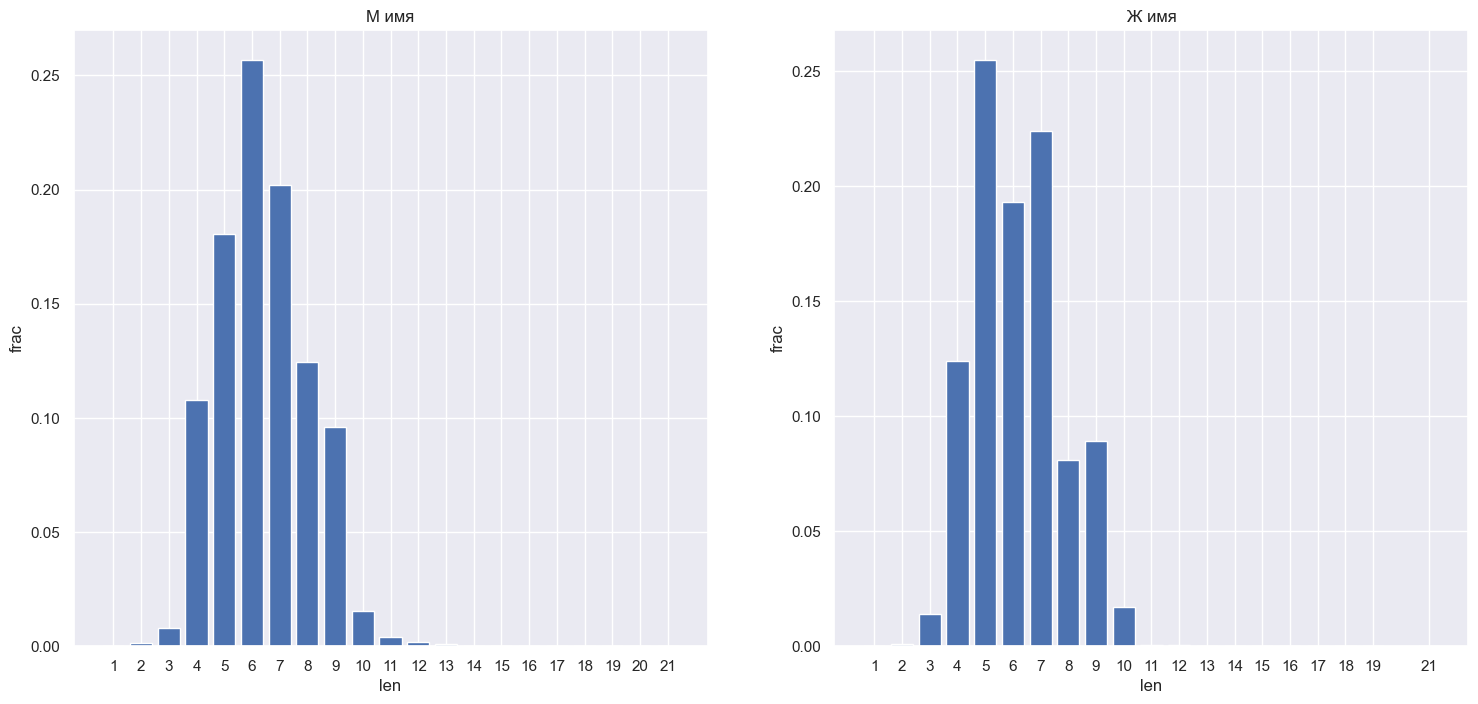

In [277]:
male_lengths = males['name'].str.len().value_counts()
female_lengths = females['name'].str.len().value_counts()
f, ax = plt.subplots(1, 2,  figsize=(18, 8))
ax[0].bar(male_lengths.index, male_lengths.values / males.shape[0])
ax[0].set_xticks(male_lengths.index)
ax[0].set_title('М имя')
ax[0].set_xlabel('len')
ax[0].set_ylabel('frac')
ax[1].bar(female_lengths.index, female_lengths.values / females.shape[0])
ax[1].set_xticks(female_lengths.index)
ax[1].set_title('Ж имя')
ax[1].set_xlabel('len')
ax[1].set_ylabel('frac')
plt.show()

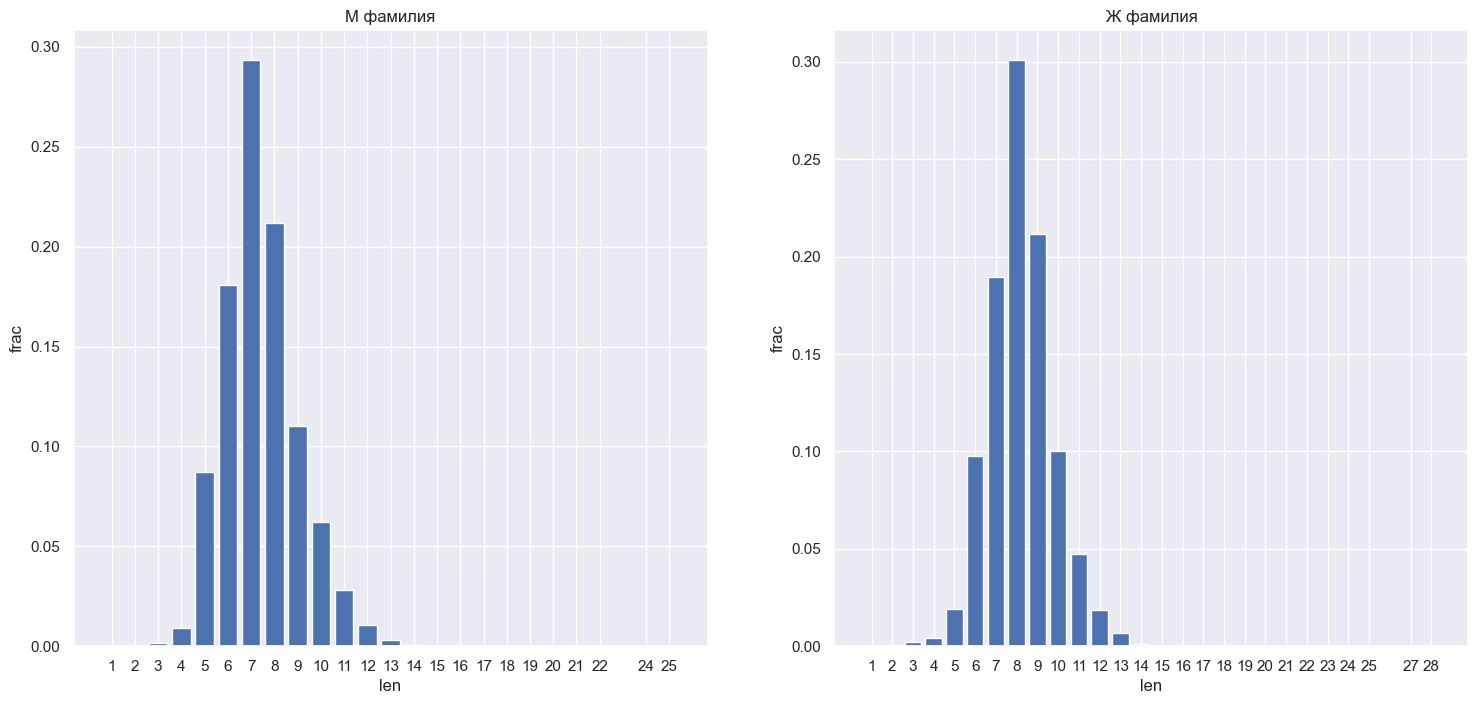

In [278]:
male_lengths = males['surname'].str.len().value_counts()
female_lengths = females['surname'].str.len().value_counts()
f, ax = plt.subplots(1, 2,  figsize=(18, 8))
ax[0].bar(male_lengths.index, male_lengths.values / males.shape[0])
ax[0].set_xticks(male_lengths.index)
ax[0].set_title('М фамилия')
ax[0].set_xlabel('len')
ax[0].set_ylabel('frac')
ax[1].bar(female_lengths.index, female_lengths.values / females.shape[0])
ax[1].set_xticks(female_lengths.index)
ax[1].set_title('Ж фамилия')
ax[1].set_xlabel('len')
ax[1].set_ylabel('frac')
plt.show()

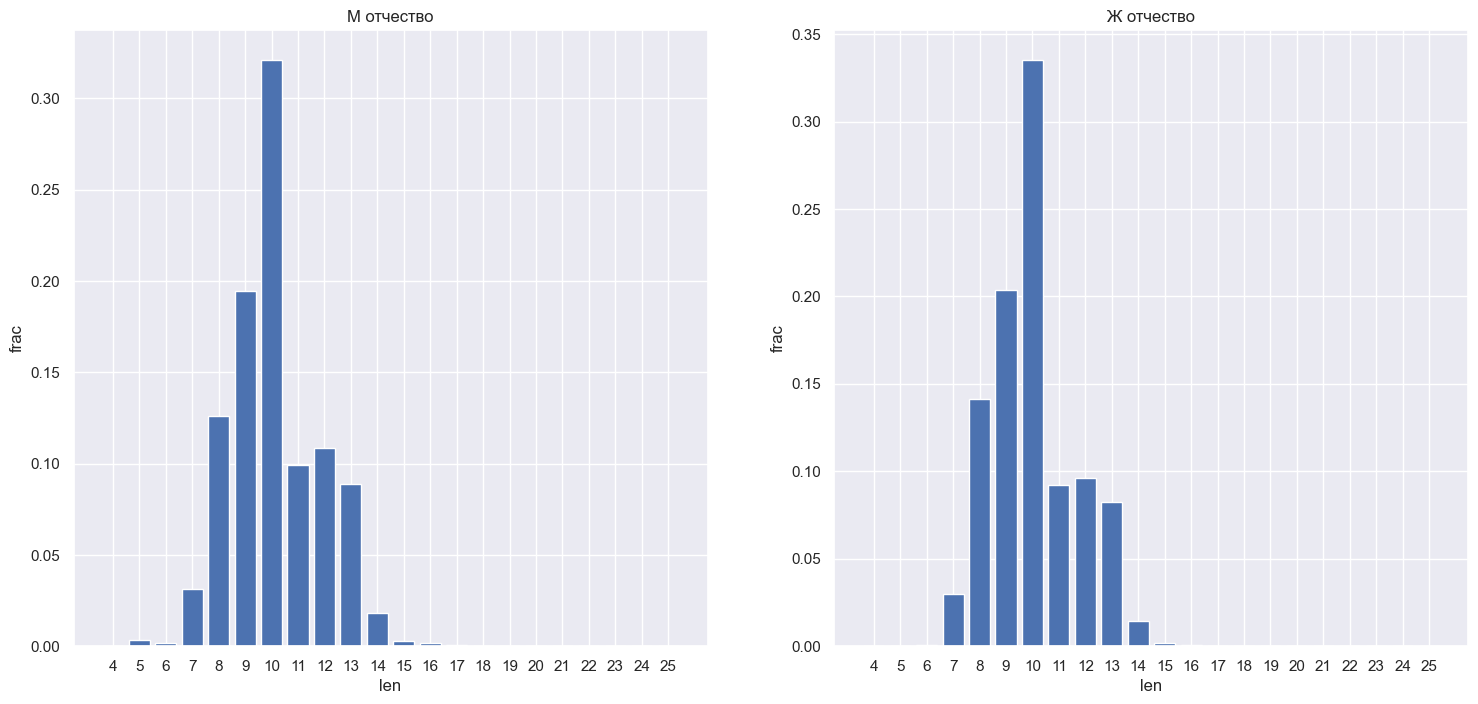

In [279]:
male_lengths = males['father_name'].str.len().value_counts()
female_lengths = females['father_name'].str.len().value_counts()
f, ax = plt.subplots(1, 2,  figsize=(18, 8))
ax[0].bar(male_lengths.index, male_lengths.values / males.shape[0])
ax[0].set_xticks(male_lengths.index)
ax[0].set_title('М отчество')
ax[0].set_xlabel('len')
ax[0].set_ylabel('frac')
ax[1].bar(female_lengths.index, female_lengths.values / females.shape[0])
ax[1].set_xticks(female_lengths.index)
ax[1].set_title('Ж отчество')
ax[1].set_xlabel('len')
ax[1].set_ylabel('frac')
plt.show()

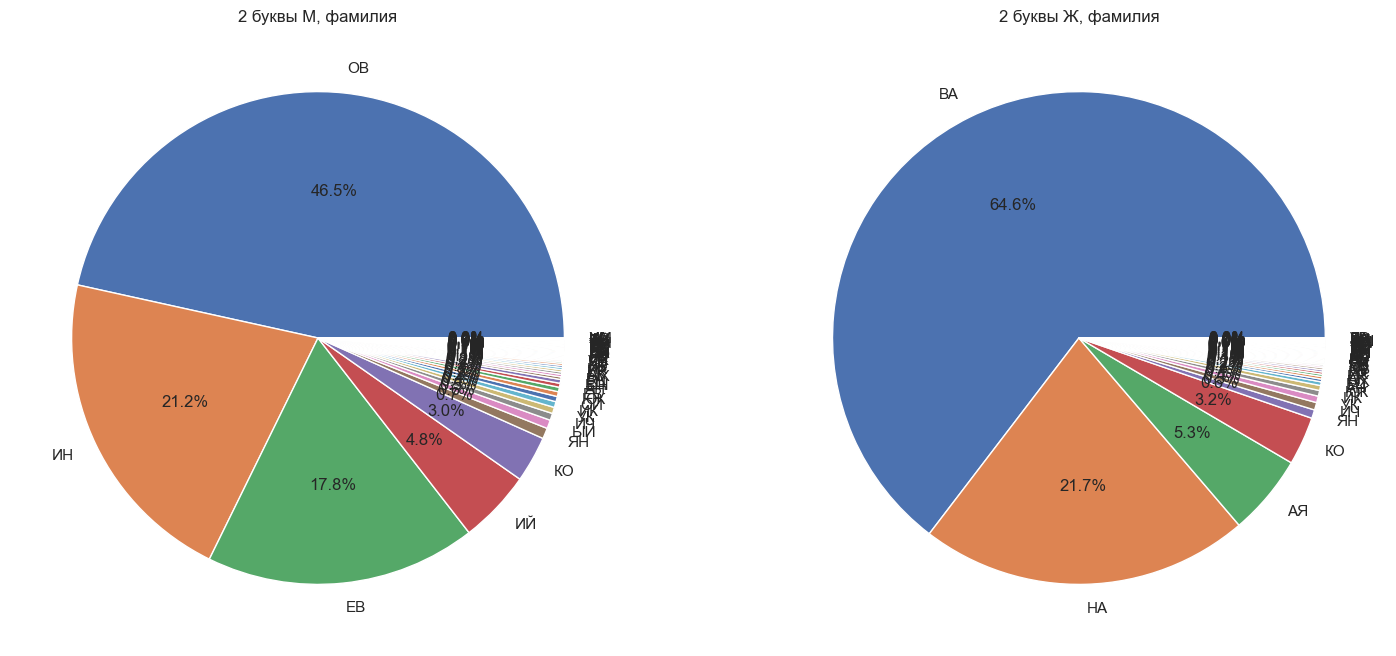

In [280]:
male_ends = males['surname'].apply(lambda x: x[-2:] if type(x) is str else x).value_counts()[:50]
female_ends = females['surname'].apply(lambda x: x[-2:] if type(x) is str else x).value_counts()[:50]
f, ax = plt.subplots(1, 2,  figsize=(18, 8))
ax[0].pie(male_ends.values, labels=male_ends.index, autopct="%1.1f%%")
ax[0].set_title('2 буквы М, фамилия')
ax[1].pie(female_ends.values, labels=female_ends.index, autopct="%1.1f%%")
ax[1].set_title('2 буквы Ж, фамилия')
plt.show()

In [281]:
male_ends

surname
ОВ    1885502
ИН     858522
ЕВ     719954
ИЙ     193882
КО     122695
ЯН      28505
ЫЙ      22874
ИЧ      18554
УК      16577
ИК      15466
ОЙ      14020
ЮК      12853
ЁВ      11995
АН      10467
ЫН      10125
ЕЦ       6901
ВА       6637
ЫХ       6276
АК       6037
ЕР       5832
ИХ       5347
ЛЬ       5303
КА       4189
ЛИ       3951
УН       3691
ОК       3463
ЗЕ       3356
ЯК       3271
РЬ       3109
ЛО       3029
АЙ       2947
ДА       2645
РА       2417
НА       2365
НЬ       2288
ГА       2257
БА       2201
ТА       2119
ИЯ       1958
УС       1811
ИС       1808
ОН       1782
АЧ       1763
ЕЙ       1762
АС       1603
ЕН       1590
АР       1494
НЦ       1392
ИМ       1348
ХА       1322
Name: count, dtype: int64

In [347]:
test_data = data[data['surname'].notna() & data['surname'].str.endswith('ИМ')].drop_duplicates(subset='surname')['surname'].tolist()
# test_data = [x.str for x in data['surname'] if data['surname'] is str and data['surname'].str.endswith('ИМ')]
print(test_data)

['АБДЕЛЬ-РАХИМ', 'БАРДАДИМ', 'БАРДАЛИМ', 'БУГРИМ', 'БУТРИМ', 'ГУДИМ', 'ГУСАИМ', 'ЗОСИМ', 'ИКИМ', 'ИМ', 'КАРАИМ', 'КЕЛИМ', 'КИЗИМ', 'КИМ', 'КЛИМ', 'КОСАРИМ', 'КУЖИМ', 'ЛИМ', 'МАКСИМ', 'НАЗИМ', 'НЕЩАДИМ', 'НИМ', 'ОХРИМ', 'РУДИМ', 'СААГИМ', 'САВРАДИМ', 'САГИМ', 'СИМ', 'СЛОНИМ', 'СУЛИМ', 'ТАСЛИМ', 'ТРАПЕЗИМ', 'УЛИМ', 'ХАЛАИМ', 'ЮХИМ', 'ШТИМ', 'БУТУРЛИМ', 'БРАИМ', 'ТИКИМ', 'ХАРАИМ', 'ГЕРАСИМ', 'ИБРАХИМ', 'ИБРИШИМ', 'ЗАСИМ', 'САСИМ', 'ШУЛИМ', 'ВИЛИМ', 'ЯКИМ', 'ЮСИМ', 'САЛИМ', 'ЗАМЕСИМ', 'РИМ', 'ГАЛИИМ', 'БУДИМ', 'КАРИМ', 'БЕЛИМ', 'НАИМ', 'ЩЕРБИНСКИМ', 'ЕКИМ', 'ЭРХИМ', 'ТРОФИМ', 'КАКОШСКИМ', 'ХЕРОИМ', 'БЫЛИМ', 'КАСАРИМ', 'КОЧИМ', 'ЛОИМ', 'БЛАЖЕЕВИМ', 'ИЛГИМ', 'ИБРАГИМ', 'ХАШИМ', 'БУРИМ', 'ХУСАИМ', 'РАХИМ', 'ЗИСИМ', 'ГАРАСИМ', 'МИНКШТИМ', 'СЛИМ', 'ШПТИМ', 'МАРТИМ', 'ТОВХОДИМ', 'РУСАЛИМ', 'БОЛЬШИМ', 'ЛУКЬЯНИМ', 'БУЗДИМ', 'АБДУЛРАХИМ', 'БИЛИМ', 'ПЛАКСИМ', 'ЧИКИМ', 'НАДИМ', 'МИКШТИМ', 'ЗАЛИМ', 'АБДЕЛЬРАХИМ', 'ИОХИМ', 'ЕФРИМ', 'ЕХИМ', 'НЕСХОДИМ', 'ЕФИМ', 'ГАЖИМ', 'ГУРИМ', 'АНИСИМ', 'ГИДИРИМ', 'МАС

In [283]:
female_ends

surname
ВА    3119463
НА    1045287
АЯ     255065
КО     153179
ЯН      27209
ИЧ      23784
УК      20612
ИК      18160
ЮК      15819
АН      11734
ЕЦ       8488
ЫХ       8180
АК       7206
ЕР       7164
ИХ       6752
ЛЬ       6310
ОВ       5267
КА       4902
УН       4529
ОК       4145
ЯК       4012
ЛИ       3857
РЬ       3854
НЬ       3802
ЗЕ       3429
ЛО       3315
ДА       3256
АЙ       3219
ИЙ       3185
РА       3061
ТА       2916
ИН       2794
БА       2721
ГА       2660
УС       2369
АЧ       2176
ИЯ       2165
ЕЙ       2161
ИС       1974
ОН       1973
АР       1708
ИМ       1681
АШ       1632
ЕВ       1621
АС       1611
НЦ       1570
ХА       1553
ЕН       1512
УР       1509
ЛА       1340
Name: count, dtype: int64

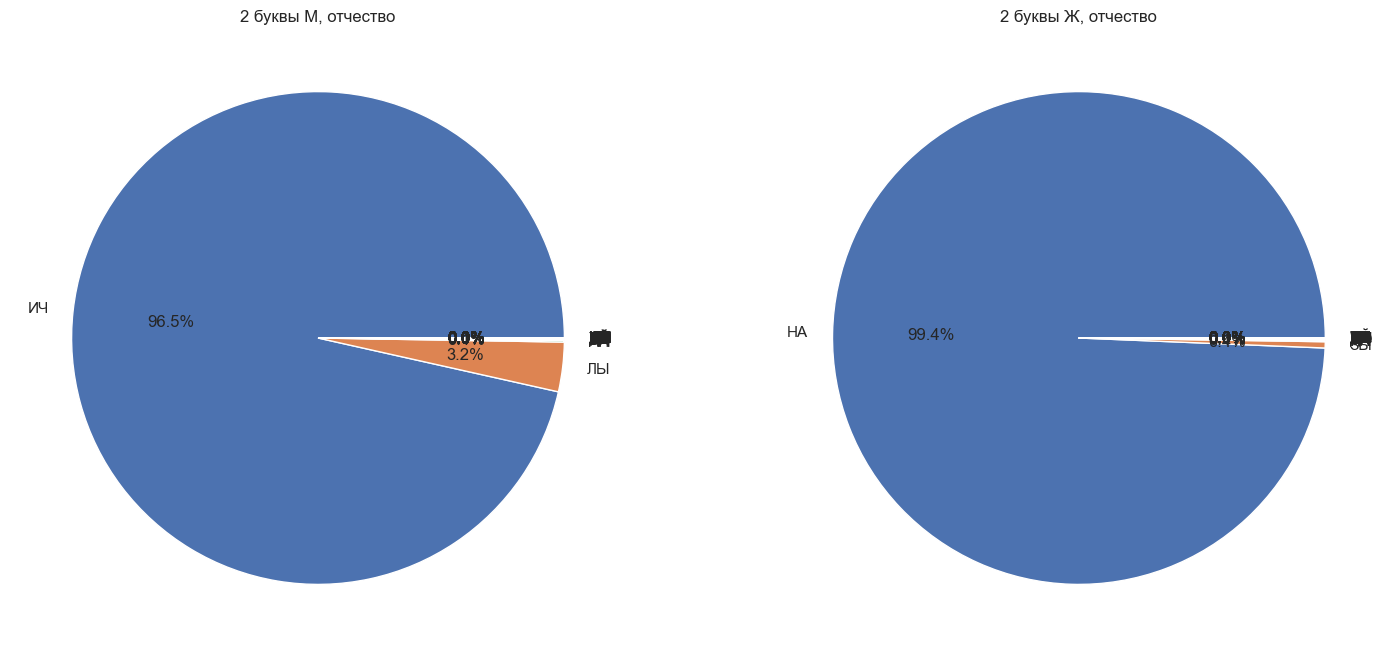

In [284]:
male_ends = males['father_name'].apply(lambda x: x[-2:] if type(x) is str else x).value_counts()[:50]
female_ends = females['father_name'].apply(lambda x: x[-2:] if type(x) is str else x).value_counts()[:50]
f, ax = plt.subplots(1, 2,  figsize=(18, 8))
ax[0].pie(male_ends.values, labels=male_ends.index, autopct="%1.1f%%")
ax[0].set_title('2 буквы М, отчество')
ax[1].pie(female_ends.values, labels=female_ends.index, autopct="%1.1f%%")
ax[1].set_title('2 буквы Ж, отчество')
plt.show()

In [285]:
male_ends

father_name
ИЧ    3968321
ЛЫ     133388
НА       4273
ВИ       1098
ОВ       1091
АН        326
ЕВ        255
 -        242
ЛИ        189
ИН        186
ИР        156
ВА        153
АД        136
ЗЫ        135
КИ        125
НИ        117
АР        106
ВЧ        100
ЕД         99
 *         95
ИЙ         94
ДИ         91
НО         85
ДР         83
ЛЬ         81
НГ         81
ЕР         79
ЛА         78
ИЛ         77
ЕТ         74
ИМ         73
МЧ         71
ЕЙ         66
ОР         65
ЕН         65
ИС         62
АЙ         60
ИД         59
АМ         58
РИ         58
ТИ         56
АС         56
ОН         55
ДО         52
АТ         50
ИЯ         47
НЬ         46
ИК         46
**         43
СИ         43
Name: count, dtype: int64

In [286]:
female_ends

father_name
НА    4869419
ЗЫ      19969
ИЧ       4882
ВА       2062
ВН       1569
ОВ        896
ЛЫ        295
АН        150
 -        136
ИЯ        135
ИН         94
НО         84
РА         78
НИ         66
ЛИ         65
ЕВ         65
ЗИ         58
ГА         51
КА         51
КИ         49
ЛА         45
НГ         45
ЕТ         44
ИР         43
ДР         43
СА         43
РИ         41
НЕ         40
ЕН         37
ТО         37
АА         36
ДО         35
ИС         35
МА         32
АЙ         32
АД         32
**         30
ДА         30
ДИ         30
АР         29
 *         29
ИЙ         27
ЕА         27
НЬ         26
АВ         25
АЪ         25
РО         25
НВ         24
ТИ         24
ЕД         24
Name: count, dtype: int64

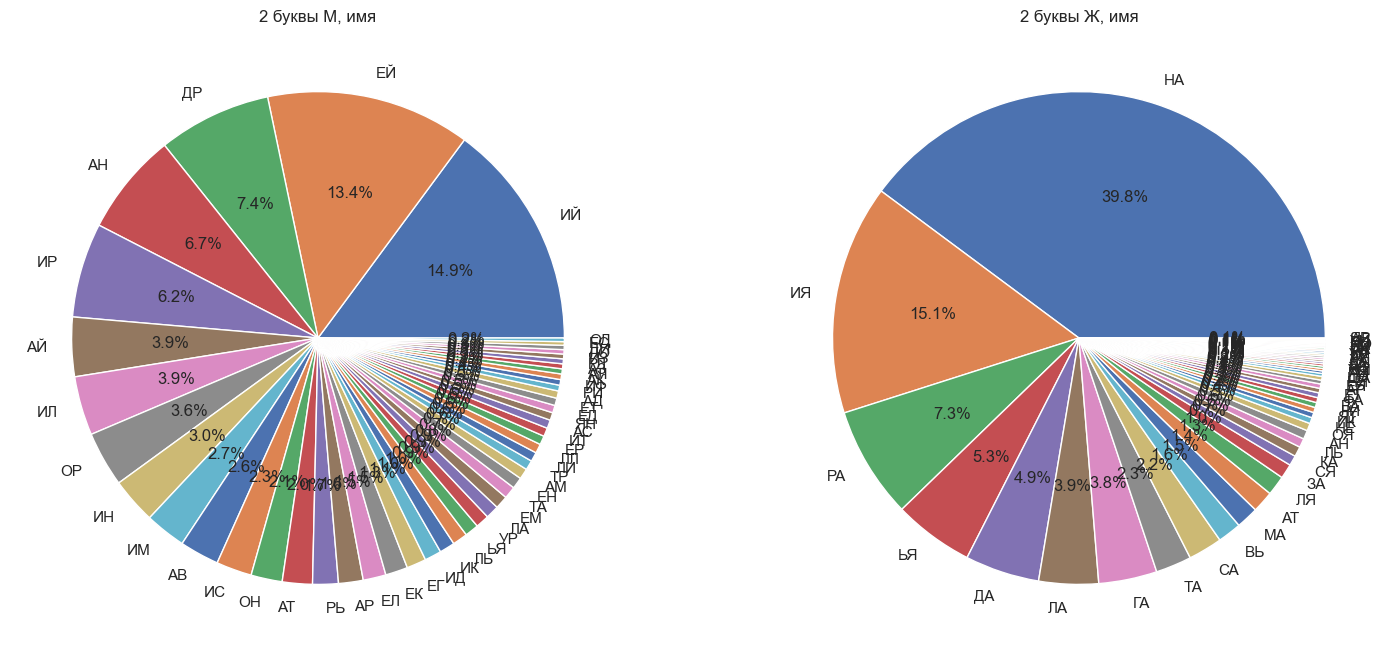

In [287]:
male_ends = males['name'].apply(lambda x: x[-2:] if type(x) is str else x).value_counts()[:50]
female_ends = females['name'].apply(lambda x: x[-2:] if type(x) is str else x).value_counts()[:50]
f, ax = plt.subplots(1, 2,  figsize=(18, 8))
ax[0].pie(male_ends.values, labels=male_ends.index, autopct="%1.1f%%")
ax[0].set_title('2 буквы М, имя')
ax[1].pie(female_ends.values, labels=female_ends.index, autopct="%1.1f%%")
ax[1].set_title('2 буквы Ж, имя')
plt.show()

In [288]:
male_ends

name
ИЙ    551467
ЕЙ    497298
ДР    275213
АН    249380
ИР    230053
АЙ    144216
ИЛ    143570
ОР    134077
ИН    111516
ИМ     99497
АВ     96062
ИС     86484
ОН     76041
АТ     73094
РЬ     62410
АР     59882
ЕЛ     55551
ЕК     54208
ЕГ     47509
ИД     40789
ИК     37290
ЛЬ     36630
ЬЯ     33578
УР     32996
ЛА     32459
ЕМ     31607
ТА     29770
ЕН     27726
АМ     25821
ТР     23370
ЛИ     22576
ЛЛ     22440
ЕР     21599
ИТ     20718
АС     20506
ЯН     18725
ЕД     18224
ЕТ     17899
АД     17761
РИ     14130
ИФ     13660
АК     13621
АЛ     12482
АЗ     12071
РД     12019
ИЗ     11545
ЛО     10577
ДИ     10471
ЕС      8820
ОД      8684
Name: count, dtype: int64

In [289]:
female_ends

name
НА    1900312
ИЯ     720035
РА     349324
ЬЯ     251108
ДА     232668
ЛА     186515
ГА     182611
ТА     112016
СА     106705
ВЬ      74165
МА      69825
АТ      67356
ЛЯ      61666
ЗА      45715
СЯ      31584
КА      31493
ЛЬ      27989
АН      27635
ОЯ      23548
НЕ      18876
ИК      16768
ЯТ      16123
ЛИ      15791
ВА      15442
ФА      15374
ЕТ      14082
АР      13838
ЕЯ      11954
НЯ      11779
ША       9242
НЭ       7884
АЯ       7592
УШ       7345
АЗ       7033
БА       6253
ДЯ       6152
ХА       6072
ЛУ       6017
АЙ       5457
УР       5382
УЛ       5323
АК       4925
АА       4887
РЯ       4488
НИ       4326
НО       4318
ЕН       4229
УИ       4151
АЛ       3998
ЯР       3984
Name: count, dtype: int64

In [290]:
vowels = set('ЁУЕЫАОЭЯИЮ')
def eval_vowel_num(string):
    return sum([*map(lambda x: string.count(x), vowels)])

def eval_vowel_ratio(string):
    if type(string) != str:
        return 0
    return eval_vowel_num(string.upper()) / len(string)

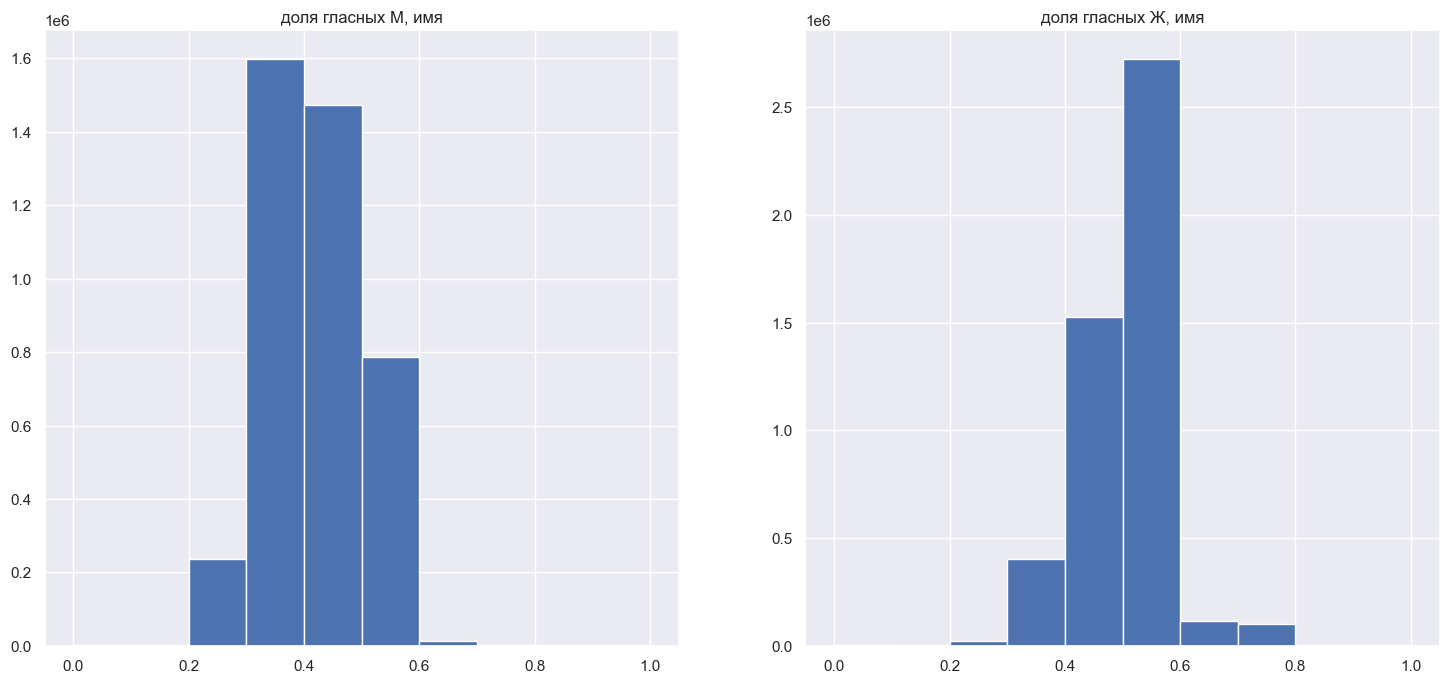

In [291]:
# для имен
male_vowel_counts = males['name'].apply(eval_vowel_ratio)
female_vowel_counts = females['name'].apply(eval_vowel_ratio)
f, ax = plt.subplots(1, 2,  figsize=(18, 8))
ax[0].hist(male_vowel_counts)
ax[0].set_title('доля гласных М, имя')
ax[1].hist(female_vowel_counts)
ax[1].set_title('доля гласных Ж, имя')
plt.show()

# Prepossessing

In [292]:
dataset = data.copy()

In [293]:
dataset = dataset.loc[dataset['sex'].isin(('М', 'Ж'))]

In [294]:
print(dataset.shape)
# dataset = dataset.drop_duplicates()
dataset.shape

(9017511, 4)


(9017511, 4)

In [295]:
preprocess_str = lambda x: re.sub(r'\s+ ', '', str(x).upper()).replace('Ё', 'Е')

In [296]:
dataset['name'] = dataset['name'].apply(preprocess_str)
dataset['surname'] = dataset['surname'].apply(preprocess_str)
dataset['father_name'] = dataset['father_name'].apply(preprocess_str)

In [297]:
def is_cirillic(string):
    return bool(re.search('^([А-Я]+\-?[А-Я]+)?$', str(string)))

In [298]:
dataset = dataset[dataset['name'].apply(is_cirillic)]
dataset = dataset[dataset['surname'].apply(is_cirillic)]
dataset = dataset[dataset['father_name'].apply(is_cirillic)]

In [299]:
dataset.fillna('~1', inplace=True)

Закодируем пол как {'М': 1, 'Ж': 0)

In [300]:
dataset['sex'] = dataset['sex'].apply(lambda x: int(x == 'М'))

In [301]:
dataset.to_csv('preprocessed_nofeatures.csv', index=False)

In [302]:
coded = dataset.copy()

In [303]:
coded['vowel_rate'] = coded['name'].apply(eval_vowel_ratio)

In [304]:
coded['surend'] = coded['surname'].apply(lambda x: x[-2:])
coded['nameend'] = coded['name'].apply(lambda x: x[-2:])
coded['fatend'] = coded['father_name'].apply(lambda x: x[-2:])
coded['num_let_sur'] = coded['surname'].apply(lambda x: len(x))
coded['num_let_nam'] = coded['name'].apply(lambda x: len(x))
coded['num_let_fat'] = coded['father_name'].apply(lambda x: len(x))
coded['has_m_fatend'] = coded['father_name'].apply(lambda x: int(x[-2:] in set(['ИЧ', 'ЛЫ'])))
coded['has_m_surend'] = coded['surname'].apply(lambda x: int(x[-2:] in set(['ОВ', 'ИН', 'ЯН'])))
coded['has_m_namend'] = coded['name'].apply(lambda x: int(x[-2:] in set(['ИЙ', 'ЕЙ', 'ДР', 'ИР', 'АН', 'АЙ', 'ОР'])))

# coded['has_m_fatend'] = coded['father_name'].apply(lambda x: int(x[-2:] in set(['ИЧ', 'ЛЫ', 'НА', 'ЗЫ'])))
# coded['has_m_surend'] = coded['surname'].apply(lambda x: int(x[-2:] in set(['ОВ', 'ИН', 'ЯН', 'ЕВ', 'ИЙ', 'КО', 'ЫЙ', 'ВА', 'НА', 'АЯ', 'ИЧ', 'УК'])))
# coded['has_m_namend'] = coded['name'].apply(lambda x: int(x[-2:] in set(['ЬЯ', 'ВЬ', 'КА', 'ИН', 'ЗА', 'ТА', 'ЕЙ', 'АВ', 'ИС', 'ЕК', 'ЕН', 'СА',
#                                         'ЕР', 'ДР', 'ОЯ', 'АР', 'ИР', 'ЛЛ', 'ИК', 'НЕ', 'ЛЯ', 'СЯ', 'ЕГ', 'ИТ',
#                                         'ОР', 'ГА', 'ИЙ', 'ИМ', 'НА', 'ИЛ', 'ОН', 'ЕЛ', 'МА', 'АЙ', 'УР', 'ЛА',
#                                         'РА', 'РЬ', 'АМ', 'ТР', 'АС', 'ДА', 'ИД', 'ЛИ', 'АН', 'АТ', 'ЕМ', 'ЛЬ', 'ИЯ'])))

coded

,surname,name,father_name,sex,vowel_rate,surend,nameend,fatend,num_let_sur,num_let_nam,num_let_fat,has_m_fatend,has_m_surend,has_m_namend
0,АБАБИЙ,АНДРЕЙ,ВАСИЛЬЕВИЧ,1,0.333333,ИЙ,ЕЙ,ИЧ,6,6,10,1,0,1
1,АБАБИЛОВ,ДМИТРИЙ,НИКОЛАЕВИЧ,1,0.285714,ОВ,ИЙ,ИЧ,8,7,10,1,1,1
2,АБАБИЛОВ,ВЛАДИМИР,ИВАНОВИЧ,1,0.375000,ОВ,ИР,ИЧ,8,8,8,1,1,1
3,АБАБИЛОВ,СЕРГЕЙ,ИВАНОВИЧ,1,0.333333,ОВ,ЕЙ,ИЧ,8,6,8,1,1,1
4,АБАБИЛОВ,ЮРИЙ,ВЛАДИМИРОВИЧ,1,0.500000,ОВ,ИЙ,ИЧ,8,4,12,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9218588,ТАРТАКОВСКИЙ,МСТИСЛАВ,ДАУЛЕТОВИЧ,1,0.250000,ИЙ,АВ,ИЧ,12,8,10,1,0,0
9218589,ПЛИСОВ,МАРИ,ТУРДАЛИЕВИЧ,1,0.500000,ОВ,РИ,ИЧ,6,4,11,1,1,0
9218591,МАКАРЬИН,ФИДАИЛ,ОМАРГАДЖИЕВИЧ,1,0.500000,ИН,ИЛ,ИЧ,8,6,13,1,1,0
9218592,КИВАЕВ,ХАЛЕД,РАФАИЛЬЕВИЧ,1,0.400000,ЕВ,ЕД,ИЧ,6,5,11,1,0,0


In [305]:
#coded = coded.drop(columns=['surname', 'name', 'father_name'])
coded

,surname,name,father_name,sex,vowel_rate,surend,nameend,fatend,num_let_sur,num_let_nam,num_let_fat,has_m_fatend,has_m_surend,has_m_namend
0,АБАБИЙ,АНДРЕЙ,ВАСИЛЬЕВИЧ,1,0.333333,ИЙ,ЕЙ,ИЧ,6,6,10,1,0,1
1,АБАБИЛОВ,ДМИТРИЙ,НИКОЛАЕВИЧ,1,0.285714,ОВ,ИЙ,ИЧ,8,7,10,1,1,1
2,АБАБИЛОВ,ВЛАДИМИР,ИВАНОВИЧ,1,0.375000,ОВ,ИР,ИЧ,8,8,8,1,1,1
3,АБАБИЛОВ,СЕРГЕЙ,ИВАНОВИЧ,1,0.333333,ОВ,ЕЙ,ИЧ,8,6,8,1,1,1
4,АБАБИЛОВ,ЮРИЙ,ВЛАДИМИРОВИЧ,1,0.500000,ОВ,ИЙ,ИЧ,8,4,12,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9218588,ТАРТАКОВСКИЙ,МСТИСЛАВ,ДАУЛЕТОВИЧ,1,0.250000,ИЙ,АВ,ИЧ,12,8,10,1,0,0
9218589,ПЛИСОВ,МАРИ,ТУРДАЛИЕВИЧ,1,0.500000,ОВ,РИ,ИЧ,6,4,11,1,1,0
9218591,МАКАРЬИН,ФИДАИЛ,ОМАРГАДЖИЕВИЧ,1,0.500000,ИН,ИЛ,ИЧ,8,6,13,1,1,0
9218592,КИВАЕВ,ХАЛЕД,РАФАИЛЬЕВИЧ,1,0.400000,ЕВ,ЕД,ИЧ,6,5,11,1,0,0


In [306]:
coded.to_csv('preprocessed_features_letter.csv', index=False)

In [307]:
from functools import reduce
def string_norm(min_letter, string):
  return reduce(lambda prev, cur: prev + cur ** 2, map(lambda x: ord(x) - ord(min_letter) + 1, string))

In [308]:
numeric = coded.copy()

In [309]:
from functools import partial
string_norm_app = partial(string_norm, 'А')

In [310]:

numeric['fatend'] = coded['fatend'].apply(string_norm_app)
numeric['nameend'] = coded['nameend'].apply(string_norm_app)
numeric['surend'] = coded['surend'].apply(string_norm_app)

In [311]:
pd.isnull(numeric).sum()

surname         0
name            0
father_name     0
sex             0
vowel_rate      0
surend          0
nameend         0
fatend          0
num_let_sur     0
num_let_nam     0
num_let_fat     0
has_m_fatend    0
has_m_surend    0
has_m_namend    0
dtype: int64

In [312]:
numeric.to_csv('preprocessed_features.csv', index=False)

# Модели

In [313]:
numeric = pd.read_csv("preprocessed_features.csv")

In [314]:
y = numeric['sex']
# 
X = numeric[['surname', 'name', 'father_name', 'vowel_rate', 'surend', 'nameend', 'fatend', 'num_let_sur', 'num_let_nam', 'num_let_fat', 'has_m_fatend', 'has_m_surend', 'has_m_namend']]


In [315]:
X.head(10)


,surname,name,father_name,vowel_rate,surend,nameend,fatend,num_let_sur,num_let_nam,num_let_fat,has_m_fatend,has_m_surend,has_m_namend
0,АБАБИЙ,АНДРЕЙ,ВАСИЛЬЕВИЧ,0.333333,109,106,585,6,6,10,1,0,1
1,АБАБИЛОВ,ДМИТРИЙ,НИКОЛАЕВИЧ,0.285714,24,109,585,8,7,10,1,1,1
2,АБАБИЛОВ,ВЛАДИМИР,ИВАНОВИЧ,0.375000,24,298,585,8,8,8,1,1,1
3,АБАБИЛОВ,СЕРГЕЙ,ИВАНОВИЧ,0.333333,24,106,585,8,6,8,1,1,1
4,АБАБИЛОВ,ЮРИЙ,ВЛАДИМИРОВИЧ,0.500000,24,109,585,8,4,12,1,1,1
5,АБАБИЛОВ,АЛЕКСЕЙ,НИКОЛАЕВИЧ,0.428571,24,106,585,8,7,10,1,1,1
6,АБАБИЛОВ,ВАСИЛИЙ,ФЕДОРОВИЧ,0.428571,24,109,585,8,7,9,1,1,1
7,АБАБИЛОВ,СЕРГЕЙ,ВАСИЛЬЕВИЧ,0.333333,24,106,585,8,6,10,1,1,1
8,АБАБИЛОВ,ЛЕОНИД,АЛЕКСЕЕВИЧ,0.500000,24,34,585,8,6,10,1,1,0
9,АБАБИЛОВА,НИНА,ПЕТРОВНА,0.500000,4,15,15,9,4,8,0,0,0


In [316]:
from sklearn.model_selection import train_test_split

X_train_w, X_test_w, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1810)

In [317]:
# , 'has_m_fatend', 'has_m_surend', 'has_m_namend'
indices = ['vowel_rate', 'surend', 'nameend', 'fatend', 'num_let_sur', 'num_let_nam', 'num_let_fat']
X_train = X_train_w[indices]
X_test = X_test_w[indices]

In [318]:
X_train, ind = np.unique(X_train, return_index=True, axis=0)
y_train = np.take(y_train, ind, axis=0)

In [319]:
print(X.shape)
print(X_train.shape) 
print(X_test.shape)

(8840939, 13)
(463311, 7)
(1768188, 7)


### Desicion Tree

In [320]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

dt_model = DecisionTreeClassifier(max_depth=4, criterion='entropy')
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print(f'accuracy = {accuracy_score(y_pred, y_test)}')
print(f'precision = {precision_score(y_pred, y_test)}')
print(f'recall = {recall_score(y_pred, y_test)}')
print(f'f1_score = {f1_score(y_pred, y_test)}')

C:\Users\nemow\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


accuracy = 0.9986992333394413
precision = 0.9987929720229058
recall = 0.9983099705441215
f1_score = 0.998551412876302


## Linear regression

In [321]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)
print(f'accuracy = {accuracy_score(y_pred, y_test)}')
print(f'precision = {precision_score(y_pred, y_test)}')
print(f'recall = {recall_score(y_pred, y_test)}')
print(f'f1_score = {f1_score(y_pred, y_test)}')

accuracy = 0.9980929629654766

C:\Users\nemow\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(



precision = 0.9975279865437799
recall = 0.9982222401539212
f1_score = 0.997874992595244


## Logistic regression

In [322]:
from sklearn.linear_model import LogisticRegression
logr_model = LogisticRegression(solver='sag')
logr_model.fit(X_train, y_train)
y_pred =logr_model.predict(X_test)
# y_pred = np.where(y_pred > 0.5, 1, 0)
print(f'accuracy = {accuracy_score(y_pred, y_test)}')
print(f'precision = {precision_score(y_pred, y_test)}')
print(f'recall = {recall_score(y_pred, y_test)}')
print(f'f1_score = {f1_score(y_pred, y_test)}')

C:\Users\nemow\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\nemow\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


accuracy = 0.9981240682551855
precision = 0.997705638886964
recall = 0.9981143490975093
f1_score = 0.997909952143764


## Random Forest

In [323]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, max_depth=4, criterion='entropy')
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print(f'accuracy = {accuracy_score(y_pred, y_test)}')
print(f'precision = {precision_score(y_pred, y_test)}')
print(f'recall = {recall_score(y_pred, y_test)}')
print(f'f1_score = {f1_score(y_pred, y_test)}')

C:\Users\nemow\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


accuracy = 0.9986257117455836
precision = 0.9987513938149266
recall = 0.9981879609586807
f1_score = 0.9984695979010189


## Catboost

In [324]:
from catboost import CatBoostClassifier

cb_model = CatBoostClassifier(iterations=1000,
                              depth=6,
                              learning_rate=0.1,
                              loss_function='Logloss',
                              eval_metric='AUC',
                              subsample=0.8,  # используем 80% данных для каждой итерации
                              colsample_bylevel=0.8,  # используем 80% признаков на уровне дерева
                              random_strength=1
                              )

cb_model.fit(X_train, y_train)

y_pred = cb_model.predict(X_test)
probes = cb_model.predict_proba(X_test)

print(f'accuracy = {accuracy_score(y_pred, y_test)}')
print(f'precision = {precision_score(y_pred, y_test)}')
print(f'recall = {recall_score(y_pred, y_test)}')
print(f'f1_score = {f1_score(y_pred, y_test)}')


0:	total: 185ms	remaining: 3m 4s
1:	total: 256ms	remaining: 2m 7s
2:	total: 338ms	remaining: 1m 52s
3:	total: 383ms	remaining: 1m 35s
4:	total: 427ms	remaining: 1m 24s
5:	total: 512ms	remaining: 1m 24s
6:	total: 564ms	remaining: 1m 19s
7:	total: 610ms	remaining: 1m 15s
8:	total: 655ms	remaining: 1m 12s
9:	total: 700ms	remaining: 1m 9s
10:	total: 746ms	remaining: 1m 7s
11:	total: 787ms	remaining: 1m 4s
12:	total: 828ms	remaining: 1m 2s
13:	total: 868ms	remaining: 1m 1s
14:	total: 911ms	remaining: 59.8s
15:	total: 963ms	remaining: 59.2s
16:	total: 1.01s	remaining: 58.7s
17:	total: 1.06s	remaining: 57.7s
18:	total: 1.1s	remaining: 56.7s
19:	total: 1.13s	remaining: 55.6s
20:	total: 1.19s	remaining: 55.7s
21:	total: 1.24s	remaining: 54.9s
22:	total: 1.28s	remaining: 54.5s
23:	total: 1.33s	remaining: 54.3s
24:	total: 1.39s	remaining: 54.4s
25:	total: 1.44s	remaining: 54s
26:	total: 1.49s	remaining: 53.8s
27:	total: 1.55s	remaining: 53.9s
28:	total: 1.6s	remaining: 53.8s
29:	total: 1.66s	rema

In [325]:
processed = X_test_w.copy()

In [326]:
processed['expected'] = y_test

In [327]:
processed['predicted'] = probes[:, 1]

In [328]:
processed['error'] = np.abs(processed['expected'] - processed['predicted'])

In [329]:
processed

,surname,name,father_name,vowel_rate,surend,nameend,fatend,num_let_sur,num_let_nam,num_let_fat,has_m_fatend,has_m_surend,has_m_namend,expected,predicted,error
1727129,БАРЫШНИКОВА,ВАЛЕНТИНА,МИХАЙЛОВНА,0.444444,4,15,15,11,9,10,0,0,0,0,0.000619,0.000619
2338130,КУЗЯХМЕТОВ,НАРИМАН,ТЯВФИКОВИЧ,0.428571,24,197,585,10,7,10,1,1,1,1,0.999740,0.000260
1324485,ПИСАРЕВ,МИХАИЛ,ВЛАДИМИРОВИЧ,0.500000,15,153,585,7,6,12,1,0,0,1,0.998903,0.001097
3131261,СТЕПИНА,КРИСТИНА,АНДРЕЕВНА,0.375000,15,15,15,7,8,9,0,0,0,0,0.001156,0.001156
4404191,ПРОЦЕНТОВА,СВЕТЛАНА,ТИМОФЕЕВНА,0.375000,4,15,15,10,8,10,0,0,0,0,0.000482,0.000482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6214703,СТРЕКОЗОВА,ПАТИНА,СТЕФАНОВНА,0.500000,4,15,15,10,6,10,0,0,0,0,0.000355,0.000355
108427,БЕРЕЗОВСКИЙ,МИХАИЛ,ВАСИЛЬЕВИЧ,0.500000,109,153,585,11,6,10,1,0,0,1,0.999501,0.000499
4955906,БАБИК,АННА,СЕРГЕЕВНА,0.500000,130,15,15,5,4,9,0,0,0,0,0.001377,0.001377
4152230,ТРЕФИЛОВА,НАТАЛИЯ,ВЛАДИМИРОВНА,0.571429,4,1033,15,9,7,12,0,0,0,0,0.000180,0.000180


In [330]:
processed_sorted = processed.sort_values(by='error')

## Меньше ошибок

In [331]:
processed_sorted[:20]

,surname,name,father_name,vowel_rate,surend,nameend,fatend,num_let_sur,num_let_nam,num_let_fat,has_m_fatend,has_m_surend,has_m_namend,expected,predicted,error
7982111,ЧЕРЕМИСКИН,СВ,МИНВАЛИЕВИЧ,0.0,205,27,585,10,2,11,1,1,0,1,0.999981,0.000019
6726091,БЕЛОШЕЙКИН,СВ,МИФОДЬЕВИЧ,0.0,205,27,585,10,2,10,1,1,0,1,0.999981,0.000019
8278734,РАБЫНИН,СВ,НУРГАЛИЕВИЧ,0.0,205,27,585,7,2,11,1,1,0,1,0.999974,0.000026
7227774,СУХИНИН,СВ,ИБАТУЛЛОВИЧ,0.0,205,27,585,7,2,11,1,1,0,1,0.999974,0.000026
7258677,РОССОХИН,СВ,ВЛАДИМИРОИЧ,0.0,205,27,585,8,2,11,1,1,0,1,0.999974,0.000026
7964680,СЮСЮКИН,СВ,РУСТЯМОВИЧ,0.0,205,27,585,7,2,10,1,1,0,1,0.999974,0.000026
7870349,СЕМАКИН,СВ,ЗУБЕРОВИЧ,0.0,205,27,585,7,2,9,1,1,0,1,0.999973,0.000027
8284176,МАМЫКИН,СВ,ЗУРАБОВИЧ,0.0,205,27,585,7,2,9,1,1,0,1,0.999973,0.000027
6606254,САЗЫКИН,СВ,РАХИБОВИЧ,0.0,205,27,585,7,2,9,1,1,0,1,0.999973,0.000027
6642037,МИТРЯХИН,СВ,СЕРГОЕВИЧ,0.0,205,27,585,8,2,9,1,1,0,1,0.999973,0.000027


## Больше

In [332]:
processed_sorted[-2000:]

,surname,name,father_name,vowel_rate,surend,nameend,fatend,num_let_sur,num_let_nam,num_let_fat,has_m_fatend,has_m_surend,has_m_namend,expected,predicted,error
2870713,ОСИН,СЕРГЕЙ,АЛЕКСАНДРОВНА,0.333333,205,106,15,4,6,13,0,1,1,1,0.387948,0.612052
2873843,ЯРОСЛАВЦЕВА,СВЕТЛАНА,ДМИТРИЕВИЧ,0.375000,4,15,585,11,8,10,1,0,0,0,0.613178,0.613178
4189621,ДАВЫДОВА,СОФИЯ,МИХАЙЛОВИЧ,0.600000,4,1033,585,8,5,10,1,0,0,0,0.615446,0.615446
5656815,АТОГОЙ,ЭЛЬЗА,АШОТИ,0.400000,115,9,100,6,5,5,0,0,0,0,0.616422,0.616422
4535775,МАНСУР,ХАБИБА,ЗАМИР,0.500000,309,3,298,6,6,5,0,0,0,0,0.616782,0.616782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5430136,АНДРИАНОВА,ЕЛЕНА,АЛЕКСАНДРОВНА,0.600000,4,15,15,10,5,13,0,0,0,1,0.000067,0.999933
5915337,КАПРАНОВА,ЕЛЕНА,АЛЕКСАНДРОВНА,0.600000,4,15,15,9,5,13,0,0,0,1,0.000066,0.999934
1737178,СКВОРЦОВА,ЕЛЕНА,АЛЕКСАНДРОВНА,0.600000,4,15,15,9,5,13,0,0,0,1,0.000066,0.999934
1173540,ЧУДАКОВ,ГЛЕБ,ИГОРЕВИЧ,0.250000,24,10,585,7,4,8,1,1,0,0,0.999935,0.999935


In [333]:
def preprocess(surname, name, father_name):
    string_norm_app = partial(string_norm, 'А')
    preprocess_str = lambda x: re.sub(r'\s+ ', '', str(x).upper()).replace('Ё', 'Е')

    surname, name, father_name = map(lambda x: '~' if pd.isna(x) else x, [surname, name, father_name])

    surname_n = preprocess_str(surname)[-2:]
    name_n = preprocess_str(name)[-2:]
    father_n = preprocess_str(father_name)[-2:]
    vowel_rate = eval_vowel_ratio(name)
    num_let_sur = len(surname)
    num_let_nam = len(name)
    num_let_fat = len(father_name)

    # has_m_fatend = int(father_name[-2:] in set(['ИЧ', 'ЛЫ']))
    # has_m_surend = int(surname[-2:] in set(['ОВ', 'ИН', 'ЯН']))
    # has_m_namend = int(name[-2:] in set(['ИЙ', 'ЕЙ', 'ДР', 'ИР', 'АН', 'АЙ', 'ОР']))

    # has_m_fatend = int(father_name[-2:] in set(['ИЧ', 'ЛЫ', 'НА', 'ЗЫ']))
    # has_m_surend = int(surname[-2:] in set(['ОВ', 'ИН', 'ЯН', 'ЕВ', 'ИЙ', 'КО', 'ЫЙ', 'ВА', 'НА', 'АЯ', 'ИЧ', 'УК']))
    # has_m_namend = int(name[-2:] in set(['ЬЯ', 'ВЬ', 'КА', 'ИН', 'ЗА', 'ТА', 'ЕЙ', 'АВ', 'ИС', 'ЕК', 'ЕН', 'СА',
    #                                     'ЕР', 'ДР', 'ОЯ', 'АР', 'ИР', 'ЛЛ', 'ИК', 'НЕ', 'ЛЯ', 'СЯ', 'ЕГ', 'ИТ',
    #                                     'ОР', 'ГА', 'ИЙ', 'ИМ', 'НА', 'ИЛ', 'ОН', 'ЕЛ', 'МА', 'АЙ', 'УР', 'ЛА',
    #                                     'РА', 'РЬ', 'АМ', 'ТР', 'АС', 'ДА', 'ИД', 'ЛИ', 'АН', 'АТ', 'ЕМ', 'ЛЬ', 'ИЯ']))
    return np.array([
        vowel_rate,
        string_norm_app(surname_n),
        string_norm_app(name_n),
        string_norm_app(father_n),
        num_let_sur,
        num_let_nam,
        num_let_fat
        # has_m_fatend,
        # has_m_surend,
        # has_m_namend
    ])

In [334]:
vector = preprocess('Благовидов', 'Ануар', 'Расульевич').reshape(1, -1)
print(cb_model.predict(vector))

[1]


In [335]:
cb_model.save_model('all_extended.cbm', format='cbm')

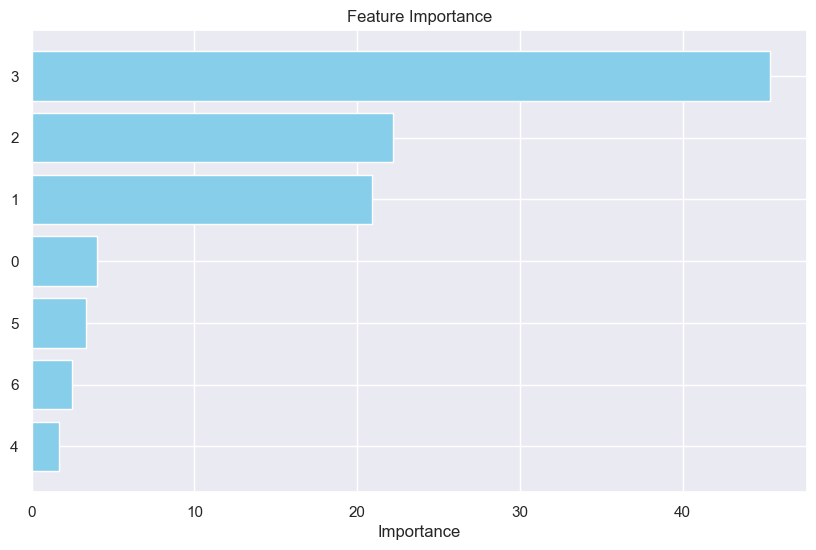

In [336]:
feature_importances = cb_model.get_feature_importance()

feature_names = cb_model.feature_names_

import pandas as pd

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()